### This script contains the following points:
#### Section 1. Importing Libraries, Defining Project Path, Importing Datasets 
- Importing dataset "expeditions_clean_2.pkl" as "df_prep"

#### Section 2. Subset Size Revisited
- Creating subset containing expeditions that are on the top ten list for either max elevation reached, member deaths, or total members as "df_prep_2"
- Check "df_pre_2" shape: (6087, 24)
- Creating subset containing only expeditions from 1990 - 2020 as "df_exp"
- Check "df_exp" shape: (5694, 24)

#### Section 3. Cleaning "df_exp" dataframe
- Check for missing values: none
- Check for duplicates: none
- Check for extreme values for variables for "mbrs_summited" with plot, mean, median, max.

#### Section 4. Exploring Relationships Revisited
- Creating subset of desired variables called "sub_2"
- Creating coefficient correlation heatmap
- Creating pair plot
- Creating scatterplot to explore the relationship between # Hired Guides vs. # Members Summited

#### Section 5. Choosing a Hypothesis
<i>If a guide is hired, the expedition is more likely to reach the summit.</i>
- x (independent variable): number of guides hired
- y (dependent variable): number of members summited

#### Section 6. Linear Regression
- [Step 1] Reshaping the variables into NumPy arrays
- [Step 2] Splitting the data into training set and test set
- [Step 3] Running a linear regression on the data
    - (3a) Fitting the created model to the training set
    - (3b) Creating a prediction for y on the test set
- [Step 4] Creating a plot that shows the regression line on the test set (w/ observations)
- [Step 5] Creating the model performance statistics
- [Step 6] Comparing predicted y values with actual y values

#### Section 7. Observations

#### Section 8. Exporting dataframe "df_exp" as "expeditiond_peak_30yrs_subset.pkl"

## Section 1. Importing Libraries, Defining Project Path, Importing Datasets

In [1]:
# Importing pandas, numpy, and os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining project folder path
path = r'C:\Users\prena\05-2023 Himalayan Expeditions Analysis'

In [4]:
path

'C:\\Users\\prena\\05-2023 Himalayan Expeditions Analysis'

In [5]:
# Importing expeditions_peak_recent_subset_2.pkl dataset as "df_exp"
df_prep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'expeditions_clean_2.pkl'))

## Section 2. Subset Size Revisited

In the last exercise, I created a subset by 1st filtering for expeditions that took place from 2010 - 2020, and then filtering by peaks that are in the top 10 list for deadliest, tallest, or most popular moutains.

This subset left a total of 2,337 records, but to do our predictive analysis we want to have atleast 5,000 observations. To remedy this, I'm adding back additional records back to 1990 (so instead of having 10 years of observations, we'll have 30 years of observations from 1990 - 2020). This along with still filtering for our selected peaks leaves us with 5,694 observations for our predictive analysis. 

In [6]:
# Create subset containing expeditions that are on the top ten list for either max elevation reached, member deaths, or total members
df_prep_2 = df_prep[df_prep.peak_id.isin(['EVER','MANA','DHA1','ANN1','KANG','AMAD','LHOT','BARU','CHOY','MAKA','KANS','NUPT','HIML','PUTH'])]

In [7]:
df_prep_2.shape

(6087, 24)

In [8]:
# Creating subset containing only expeditions from 1990 - 2020
df_exp = df_prep_2[df_prep_2['year']>=1990]

In [9]:
df_exp.shape

(5694, 24)

## Section 3. Cleaning Data Revisted

I suspect my dataset to be thoroughly cleaned from my previous scripts, but it doesn't hurt to run some extra checks!

In [10]:
# Checking for missing values
df_exp.isnull().sum()

peak_id             0
peak_name           0
nationality         0
year                0
season              0
total_days          0
exp_result          0
max_elev_reached    0
total_mbrs          0
mbrs_summited       0
mbrs_deaths         0
hired_abc           0
hired_summits       0
hired_deaths        0
is_no_hired_abc     0
is_o2_not_used      0
is_o2_climbing      0
is_o2_descent       0
is_o2_sleeping      0
is_o2_medical       0
is_o2_used          0
had_o2_unused       0
is_o2_unkwn_2       0
o2_check            0
dtype: int64

In [11]:
# Checking for duplicates
dups = df_exp.duplicated()

In [12]:
dups.shape

(5694,)

C:\Users\prena\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mbrs_summited', ylabel='Density'>

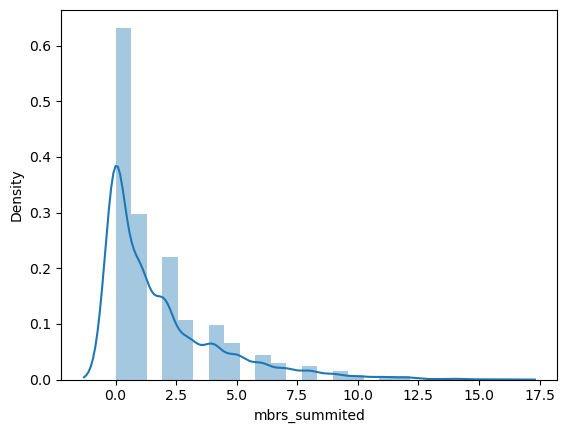

In [13]:
# Checking for extreme values for variables 'mbrs_summited'
sns.distplot(df_exp['mbrs_summited'], bins=25)

In [14]:
# Checking mean of mbrs_summited
df_exp['mbrs_summited'].mean()

1.8530031612223392

In [15]:
# Checking median of mbrs_summited
df_exp['mbrs_summited'].median()

1.0

In [16]:
# Checking max of mbrs_summited
df_exp['mbrs_summited'].max()

16

With the 'mbrs_summited' extreme values check, I'm not seeing anything so extreme that I would omit any records.

## Section 4. Exploring Relationships Revisited

With my new subset defined, I want to revisit some exploration visualizations such as the coefficient correlation heatmap and pair plot to find a pair of variables to explore further:

In [17]:
# Keep only the variables you want to use in the pair plot
sub_2 = df_exp[['total_days','max_elev_reached','total_mbrs','mbrs_summited','hired_abc','hired_summits']]

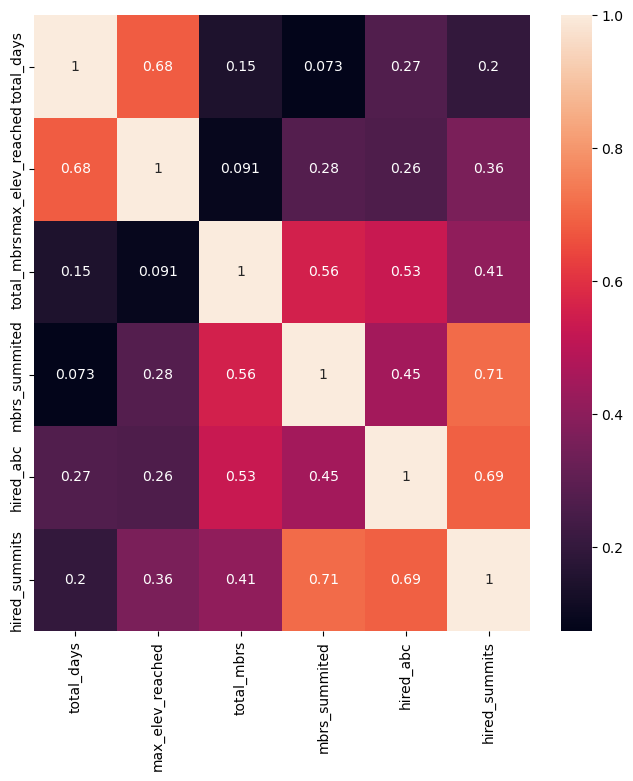

In [18]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

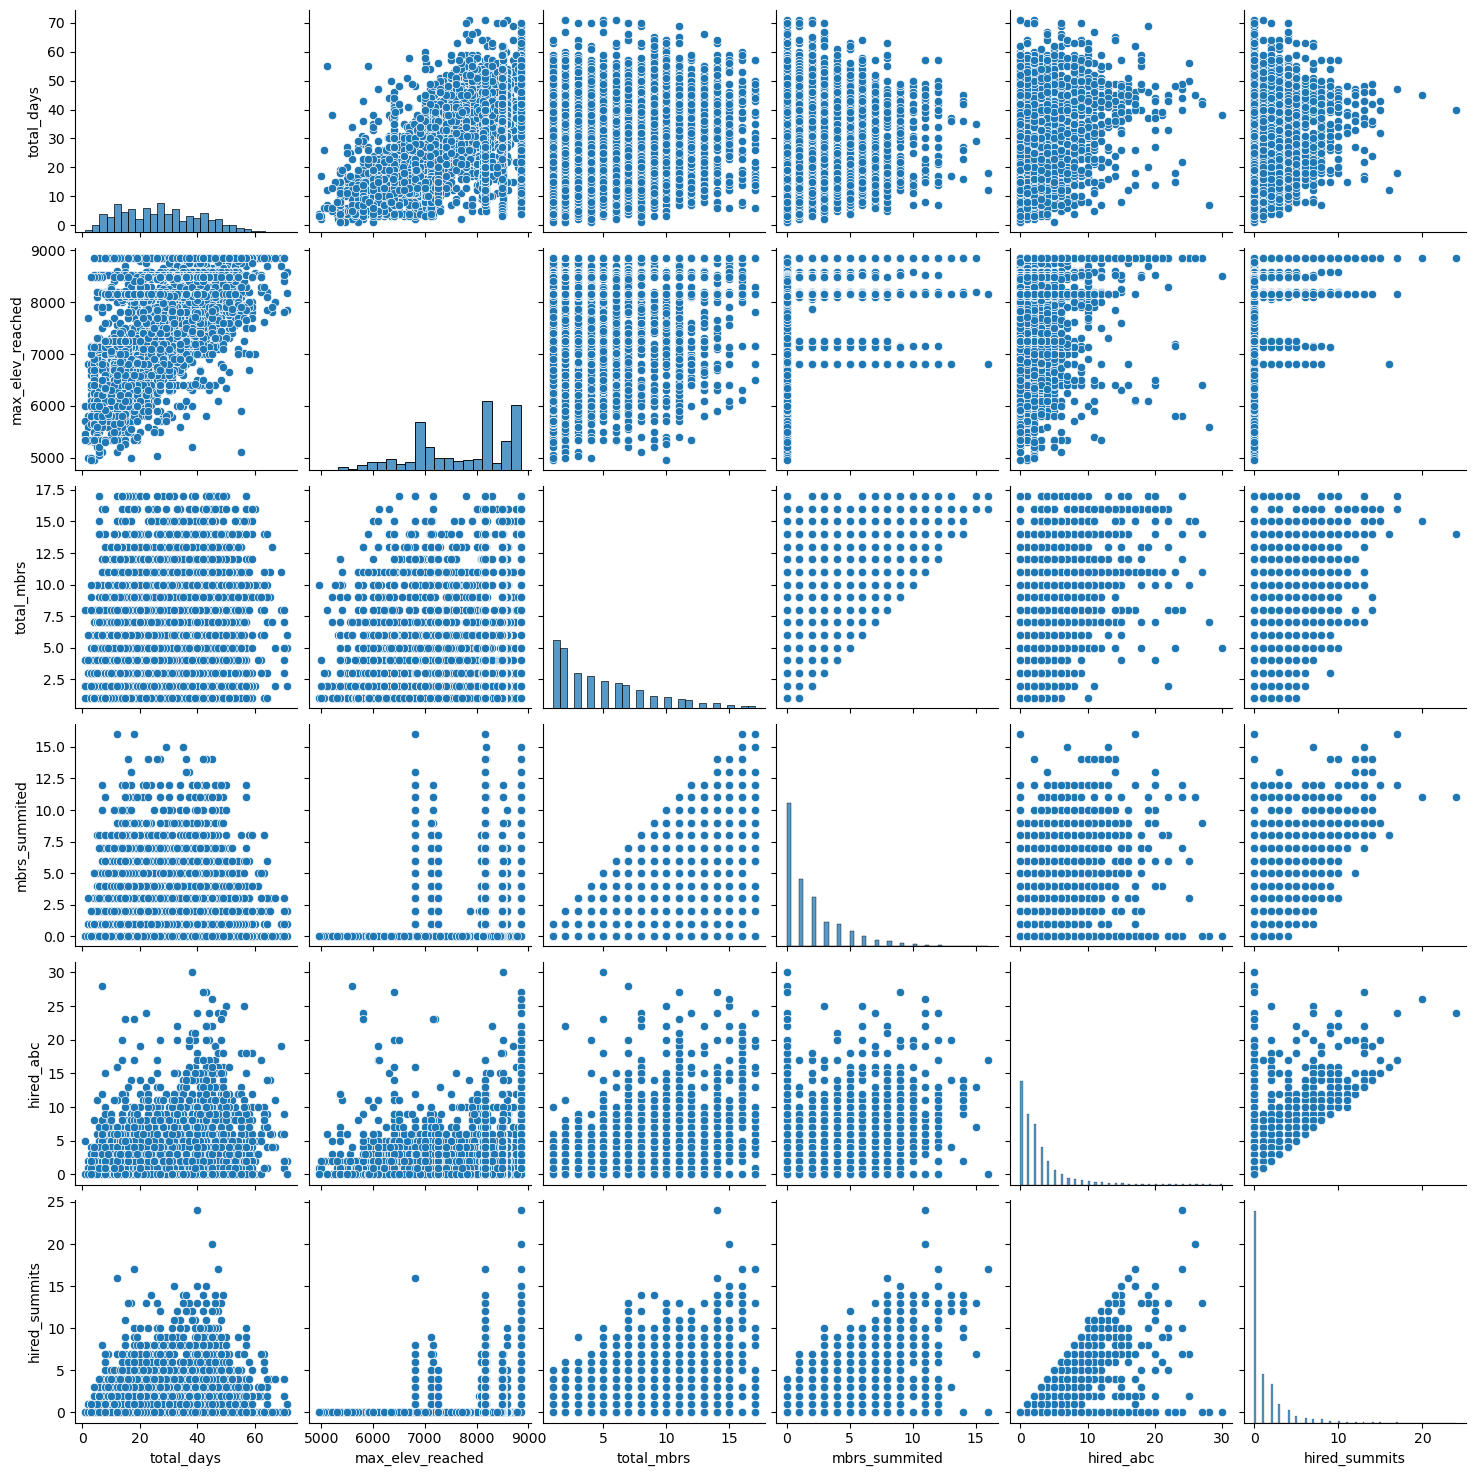

In [19]:
# Create a pair plot 

g = sns.pairplot(sub_2)

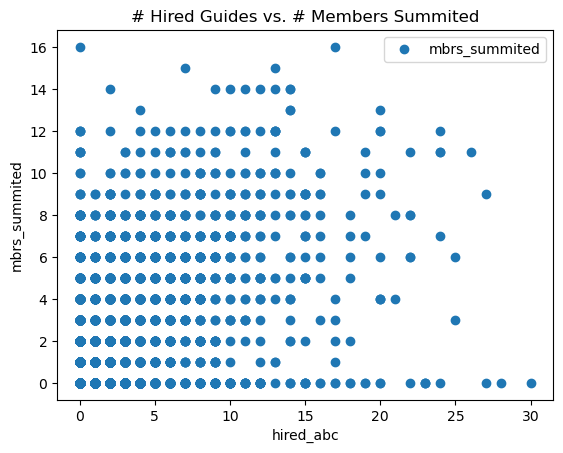

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_exp.plot(x = 'hired_abc', y='mbrs_summited',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('# Hired Guides vs. # Members Summited')  
plt.xlabel('hired_abc')  
plt.ylabel('mbrs_summited')  
plt.show()

## Section 5. Choosing a Hypothesis
<i>If a guide is hired, the expedition is more likely to reach the summit.</i>
- x (independent variable): number of guides hired
- y (dependent variable): number of members summited

## Section 6. Linear Regression 

### [Step 1]  Reshaping the variables into NumPy arrays

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_exp['hired_abc'].values.reshape(-1,1)
y = df_exp['mbrs_summited'].values.reshape(-1,1)

In [22]:
X

array([[0],
       [2],
       [0],
       ...,
       [0],
       [5],
       [1]], dtype=int64)

In [23]:
y

array([[0],
       [4],
       [0],
       ...,
       [6],
       [3],
       [1]], dtype=int64)

### [Step 2] Splitting the data into training set and test set

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### [Step 3] Running a linear regression on the data

In [25]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

#### (3a) Fitting the created model to the training set

In [26]:
# Fit the created model to the training set

regression.fit(X_train, y_train)

LinearRegression()

#### (3b) Creating a prediction for y on the test set

In [27]:
# Create a prediction for y on the test set

y_predicted = regression.predict(X_test)

### [Step 4] Creating a plot that shows the regression line on the test set.

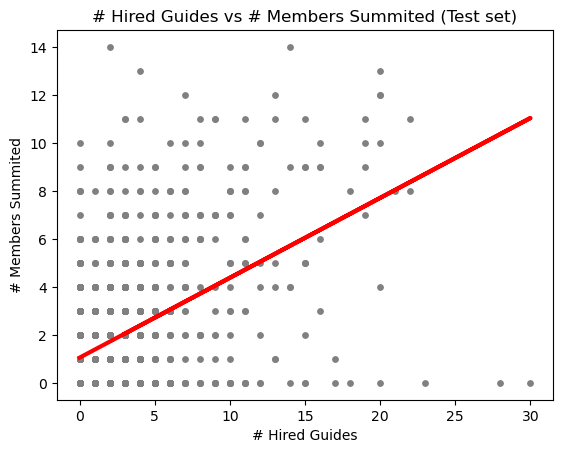

In [28]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('# Hired Guides vs # Members Summited (Test set)')
plot_test.xlabel('# Hired Guides')
plot_test.ylabel('# Members Summited')
plot_test.show()

<b>Interpretation of how well the line appears to fit the data:</b>

The line doesn't seem to fit to the scatterplot too well, as the line isn't covering many data points. I can count about 6 points that the line is covering. In addition, there doesn't seem to be a particular value for # Hired Guides (say 0-10, or 20-30), were the line is fitting better than another grouping. It overall just doesn't seem to be fitting. 

### [Step 5] Creating the model performance statistics

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [30]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.3328879]]
Mean squared error:  4.61833272758669
R2 score:  0.20391817806381562


### [Step 6] Comparing predicted y values with actual y values

In [31]:
y_predicted

array([[1.05213419],
       [1.38502209],
       [1.05213419],
       ...,
       [1.71790998],
       [1.05213419],
       [2.05079788]])

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.052134
1,1,1.385022
2,1,1.052134
3,0,1.052134
4,0,1.052134
5,0,1.052134
6,12,3.382349
7,3,1.052134
8,0,1.052134
9,0,1.052134


## Section 7. Observations

<b>Thoughts on how well the model performed on the test set:</b>

As stated before for starters, our line doesn't seem to be fitting our scatterplot too well, as there aren't many points that are being covered by the line. 

Next, looking at the slope value of 0.33, this is telling me that as my X value rises (# of Hired Guides), my y values rises as well at a degreen of 0.33. However, this isn't telling me how my model is performing.

Moving on to my MSE (root mean squared error), my MSE value is 4.6. Given that the values I'm working with are in the 10s, this is a very large MSE value which suggests that a regression may not be the best model to represent this data and we can't accurately predict the number of members to summit based on the number of hired guides.

Looking at our r-squared value of 0.20, this is telling us that our model is only explaining 20% of the variance in the data. That means there is most likely another variable (or several variables) that contribute to the number of members summited.

In summary, why the number of hired guides may contribute to the number of members summiting a peak, this is by no means the only variable contributing to how many members successfully summit. We would probably need a model with more dimensionality if we want to more accurately predict how many members of an expedition will reach the top!

<b>Reflections on the impact of possible data bias:</b>

Regarding bias, though we have a pretty large sample size we need to remember the bias initially discussed (such as collection bias and measurement bias) since any bias introduced at the collection phase will be pushed along and will impact our analysis. 

In addition, the subset I've created is for popular peaks, deadliest peaks, and tallest peaks (I'll refer to these as 'top' peaks from here on out). I could see a sccenario where climbers (especially novice climbers) see these 'top' peaks as being a major challenge and are more apt to hire a guide(s) than, say, someone who is a local or more experienced climber who may not hire a guide and may be climbing less popular peaks. My data selection could be skewed because I'm looking at the 'top' peaks and dismissing climbers who are not as 'mainstream' that are travelling on the lesser known peaks. I'm also excluding shorter peaks where climbers may not feel the need to hire a guide.

With this, I would suspect that my model is a better fit when excluding these lesser known or shorter peaks as opposed to what it would be if I included them. Here, my assumption is that if expeditions with experienced climbers or shorter peaks are less likely to hire a guide, more variation would be introduced into my model.

## Section 8. Exporting dataframe "df_exp" as "expeditiond_peak_30yrs_subset.pkl"

In [34]:
# Export data to pkl
df_exp.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'expeditions_peak_30yrs_subset.pkl'))